# <font color='tomato'>Unsupervised Learning in Satellite Imagery using Python</font>

In [ ]:
!pip install earthpy gdal   #preferred installer program

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 74.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 71.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 89.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 110.2 MB/s eta 0:00:00


# Import Modules

In [ ]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/Data

/content/drive/My Drive/Colab Notebooks/Data


In [ ]:
S_sentinel_bands = glob("/content/drive/MyDrive/Colab Notebooks/Data/Krishna_GM_data/*B?*.tiff")
S_sentinel_bands.sort()
S_sentinel_bands

In [ ]:
l = []
for i in S_sentinel_bands:
  with rio.open(i, 'r') as f:
    l.append(f.read(1))


In [ ]:
arr_st = np.stack(l)

In [ ]:
print(arr_st.shape)
print(f'Height: {arr_st.shape[1]}\nWidth: {arr_st.shape[2]}\nBands: {arr_st.shape[0]}')

(12, 954, 298)
Height: 954
Width: 298
Bands: 12


# Visualize Data

## Bands

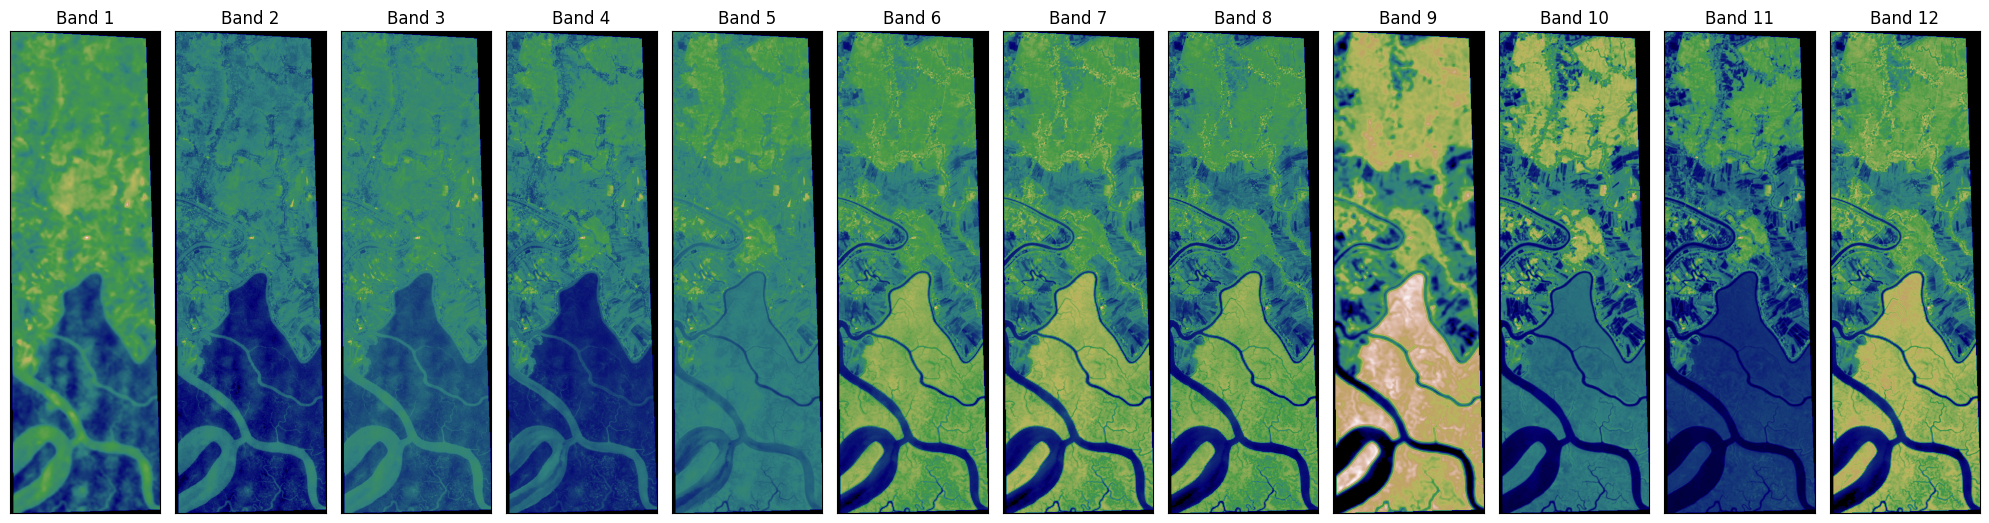

In [ ]:
ep.plot_bands(arr_st, cmap = 'gist_earth', figsize = (20, 12), cols = 12, cbar = False)
plt.show()

## RGB Composite Image

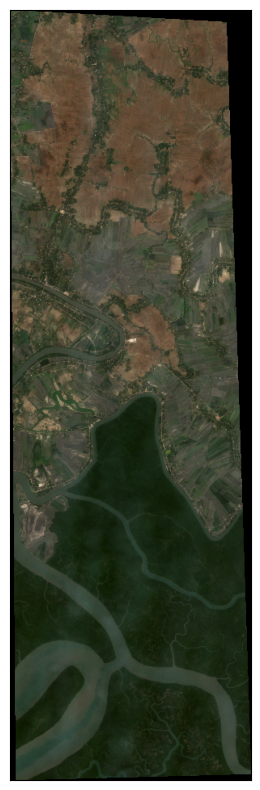

In [ ]:
rgb = ep.plot_rgb(arr_st, 
                  rgb=(3,2,1), 
                  figsize=(8,10), 
                  # title='RGB Composite Image'
                  )

plt.show()

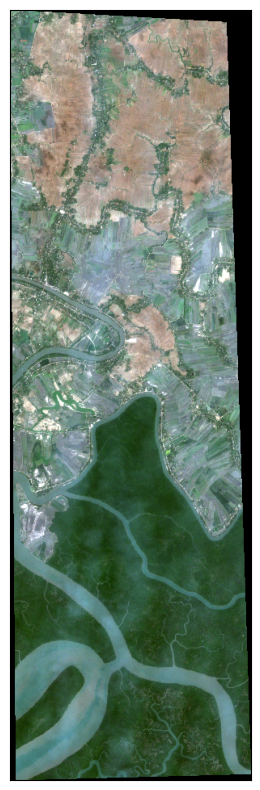

In [ ]:
ep.plot_rgb(
    arr_st,
    rgb=(3, 2, 1),
    stretch=True,
    str_clip=0.2,
    figsize=(8,10),
    # title="RGB Composite Image with Stretch Applied",
)

plt.show()

## Data Distribution of Bands

# Preprocessing 

In [ ]:
print(arr_st.shape)
x = np.moveaxis(arr_st, 0, -1)
x.shape

(12, 954, 298)


(954, 298, 12)

In [ ]:
x.reshape(-1, 12).shape  #-1 indicates the number of rows according to given array which here is 954*298

(284292, 12)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_data = x.reshape(-1, 12)

scaler = StandardScaler().fit(X_data)

X_scaled = scaler.transform(X_data)

X_scaled.shape

(284292, 12)

## Principal Component Analysis (PCA)

In [ ]:
pca = PCA(n_components = 4)

pca.fit(X_scaled)

data = pca.transform(X_scaled)

In [ ]:
data.shape

(284292, 4)

In [ ]:
pca.explained_variance_ratio_

array([0.55778198, 0.37521242, 0.0484222 , 0.00637526])

In [ ]:
np.sum(pca.explained_variance_ratio_)

0.9877918653349016

## Visualize Bands after PCA

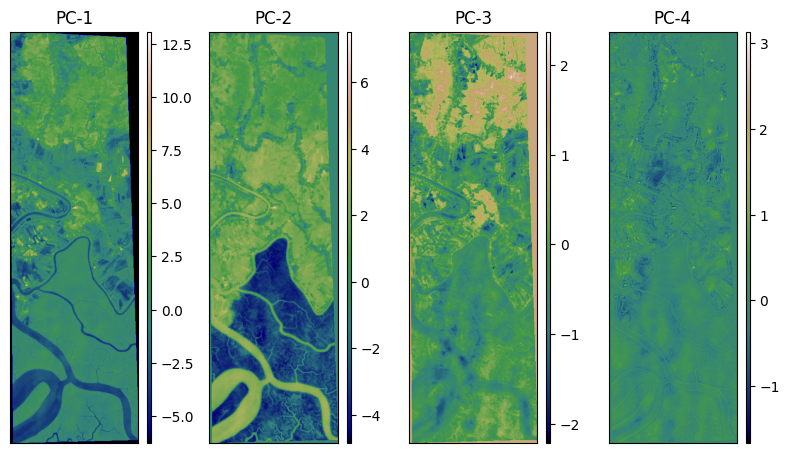

In [ ]:
ep.plot_bands(np.moveaxis(data.reshape((954, 298, data.shape[1])), -1, 0),
              figsize=(8,20),
              cmap = 'gist_earth',
              cols = 4,
              title = [f'PC-{i}' for i in range(1,5)])

plt.show()

# *k* - Means 

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 6, random_state = 11)

kmeans.fit(data)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=6, random_state=11)

In [ ]:
labels = kmeans.predict(data)

-320328.4141001748

In [ ]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=int32)

## Visualize Clusters

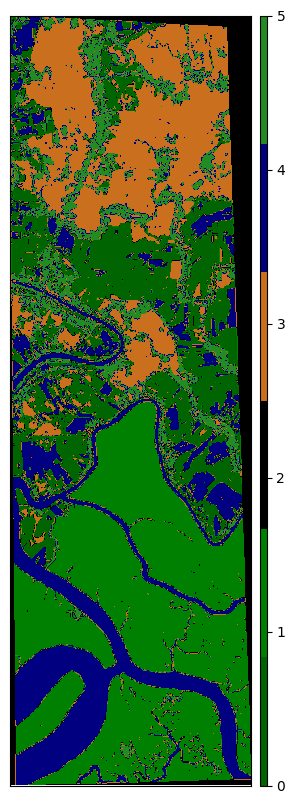

In [ ]:
ep.plot_bands(labels.reshape(954, 298),figsize=(4,10), cmap=ListedColormap(['darkgreen', 'green', 'black', '#CA6F1E', 'navy', 'forestgreen']))
plt.show()

Interactive plot using Plotly

In [ ]:
import plotly.express as px

fig = px.imshow(labels.reshape(954, 298), 
          color_continuous_scale = ['darkgreen', 'green', 'black', '#CA6F1E', 'navy', 'forestgreen'])

fig.update_xaxes(showticklabels=False)

fig.update_yaxes(showticklabels=False)

fig.update_layout(
    autosize=False,
    width=500,
    height=1000,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    # paper_bgcolor="LightSteelBlue",
)



---

